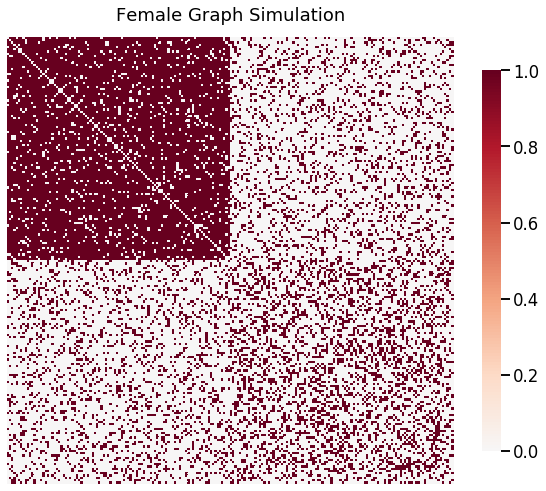

<Figure size 432x288 with 0 Axes>

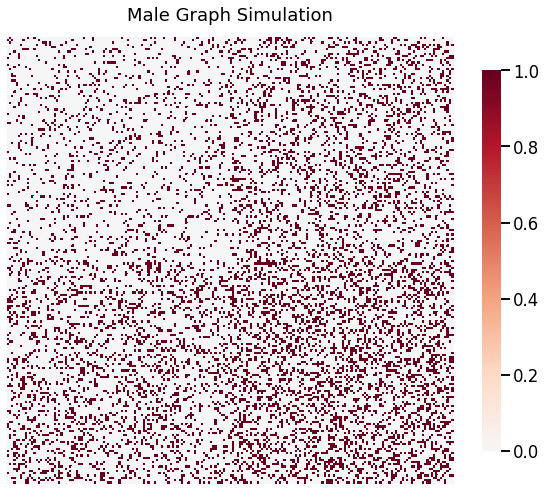

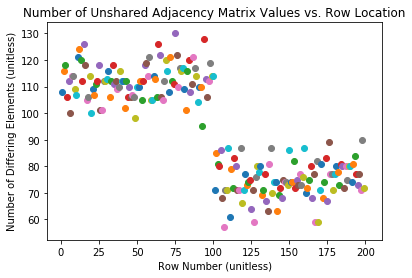

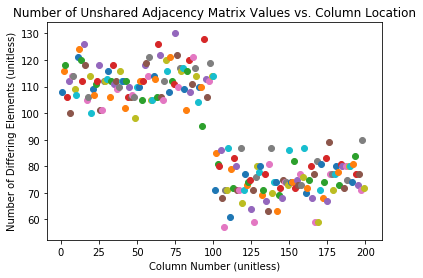

In [117]:
import graspy
import mgcpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from graspy.simulations import sbm
np.random.seed(10)

#Generating simulation/test data
male = {}
female = {}
for i in range(1,101):
    n = [100, 100]
    p_male = [[0.1, 0.2], 
              [0.2, 0.3]]
    male["male{0}".format(i)] = sbm(n=n, p=p_male)
    p_female = [[0.9, 0.2], 
                [0.2, 0.3]]
    female["female{0}".format(i)] = sbm(n=n, p=p_female)

#Dcorr formula command: sp.spatial.distance.correlation(u,v)
#Could we use this or do we have to use mgcpy?

from graspy.plot import heatmap

heatmap(female["female1"], title='Female Graph Simulation')

plt.figure()
heatmap(male["male1"], title='Male Graph Simulation')

test_female = female["female1"]
test_male = male["male1"]

y = [0]*100 + [1]*100

def iterative_screen(a_matrix, y_labels, c):

    '''
    Performs iterative screening on graphs.

    Parameters

    ----------
    
    a_matrix: the adjacency matrix for the graph that is going to be classified.

    y_labels: the vector of labels.
    
    c: the correlation threshold value.

    Returns

    -------

    x_nonit_SS: the signal subgraph of a_matrix, found through non-iterative

    vertex screening.
    '''
    
    S_hat = []
    for i in range(len(a_matrix)):
        c_u = mgcpy # mgcpy is placeholder for Dcorr command
        S_hat.append(c_u)
        
    S_hat = [abs(x) for x in S_hat]
    S_hat = S_hat.sort()
    x_nonit_SS = S_hat[(x > c)]    

def simple_class_SS(a_matrix_1, a_matrix_2):
    SS = []
    for i in range(len(a_matrix_1)):
        for j in range(len(a_matrix_1)):
            if a_matrix_1[i][j] != a_matrix_2[i][j]:
                SS.append([i + 1,j + 1])
    SS.sort()
    return SS

vals = simple_class_SS(test_female, test_male)
x = [x[0] for x in vals]
y = [x[1] for x in vals]
plt.figure()
plt.title("Number of Unshared Adjacency Matrix Values vs. Row Location")
plt.xlabel("Row Number (unitless)")
plt.ylabel("Number of Differing Elements (unitless)")
for i in range(1,len(test_female)):
    plt.scatter(i,x.count(i))

plt.figure()
plt.xlabel("Column Number (unitless)")
plt.ylabel("Number of Differing Elements (unitless)")
plt.title("Number of Unshared Adjacency Matrix Values vs. Column Location")
for i in range(1,len(test_female)):
    plt.scatter(i,y.count(i))
